### This script summarize the learning notes of neuron network and deep learning
(The main reference is "Neural Networks and Deep Learning" written by Michael Nielsen)
     
To my own understanding, neural network is a method help people constructing the estimation function s.t.  
For a given input (e.g. image with hand written digit), the estimation function can provide you the expected output you want      (e.g. digit in that image)     

The difficulty is the constructing process, the relation between output and input is not always apparent.    
Therefore, we have to use a structure of neuron network and a training process to find the best estimation function.    
Here is an example of neuron network:  
<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png" height="500" width="600">
(Image source: Jayesh Bapu Ahire https://medium.com/coinmonks/the-artificial-neural-networks-handbook-part-1-f9ceb0e376b4)

### 1. Sigmoid function
Sigmoid function is frequently used in neuron network built-up, by reviewing it, we can understand how does the input and output look like for a single neuron

e.g. The following figure shows a single neuron in network, x1~x3 is going to be the input, sigmoid function is frequently used to calculate the output value
<img src=".\Images\SingleNeuron.PNG" height="200" width="200">

By making use of Sigmoid function, the output of this neuron will be defined as:
$$ \sigma(z)=\frac {1}{1+e^{-z}}$$
in which, $\sigma(z)$ is the output and z depends on inputs of the neuron

Furthermore, z depends on input weights $w$'s and bias $b$ s.t.
$$ z = w \cdot x + b = \sum_j{w_jx_j} + b$$


### 1.1 The shape of Sigmoid function

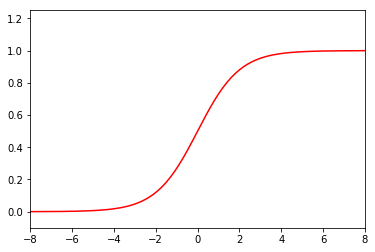

In [3]:
import numpy as np
import matplotlib.pyplot as plt
left_limit = -8.0
right_limit =8.0
z= np.arange(left_limit,right_limit+0.1,0.1)
sigma=1.0/(1.0+np.exp(-z))

plt.plot(z, sigma, 'r-')
plt.axis([left_limit,right_limit, -0.1, 1.25])
plt.show()

* From the plot we could tell there are at least these advantages of using this function:
- 1. $ 0<\sigma(z)<1$ , which ganrantee it's a well-defined probability function
 2. $\frac{\sigma(z)+\sigma(-z)}{2}=\frac{1}{2}$, which tells us this function is symmetric with respect to straight line y=0.5

### 1.2 Derivative of Sigmoid function
Next, let's take a look at the shape of its derivative:
$$ {\sigma}^{'}(z)=\frac {1}{(1+e^{-z})(1+e^{z})}$$

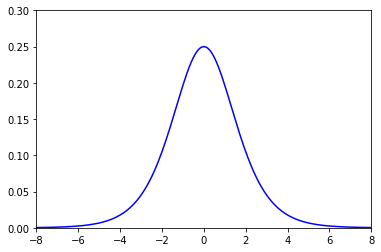

In [2]:
sigma_p=1.0/((1.0+np.exp(-z))*(1.0+np.exp(z)))
plt.plot(z, sigma_p, 'b-')
plt.axis([left_limit,right_limit,0.0,0.3])
plt.show()

### 2.1 Cost function and training of neuron network
Assume we have a cost function for so constructed neuron network, and our training goal is to minimize the output of this cost function. During the training, we tune the weights and biases to minimize the cost function until we get best results for all of the input data. 

Let's take a look at one example:
                    $$ c(w,b) = \frac{1}{2n} \sum_x{||y(x)-a||^2} \tag{Eq-2.1}$$
in which x is the input of during training, the defined cost function sums the error between estimation $y(x)$ given by network and the expected value $a$ for that input $x$, the errors are summed over the whole domain of input sets, e.g. all the $x$'s

And we should expect to see that such combination of weights and biases will give the best results for any new given input. 

### 2.2 Gradient descent 
The training process of neuron network relies a lot on gradient descent. To my understanding, gradient descent is taking a strategy s.t. cost function can always decrease the most

For example, apparently we have:
$$\Delta c = \frac{\partial c}{\partial w} \Delta w + \frac{\partial c}{\partial b} \Delta b$$
The training process consists of many iteration substeps, in each substep we are going to make a small change to our neuron network by $(\Delta w ,\Delta b)$. During one iteration, if the step size (e.g. $\sqrt {||\Delta w||^2 + ||\Delta b||^2 }$) has a fixed value, mathmetically we can prove that if $(\Delta w, \Delta b)$ follows the direction of gradient of cost function at point $(w,b)$ we will decrease the most, e.g.
$$ (\Delta w, \Delta b) = -\eta (\frac{\partial c}{\partial w}, \frac{\partial c}{\partial b}) $$
in which we use $\eta$ to control the step size and a negative symbol to guarantee the decrease of cost function.

To summarize, let 
$$v = (w,b), \nabla c = (\frac{\partial c}{\partial w}, \frac{\partial c}{\partial b})$$
then:
$$v^{'} = v - \eta \nabla c$$
$$c^{'} = c - \eta || \nabla c ||^2 $$
in each iteration, we update $v$ by $- \eta \nabla c$, and cost function decrease by $- \eta || \nabla c ||^2$

### 2.3 Stochastic gradient descent
In general, the training set can be very big (e.g. there are too many $x$'s). Recall our cost function as defined in (Eq-2.1), it relies on all the inputs. Thus it will cost too much to calculate gradient using all the $x$'s in every iterations. 
Therefore, a strategy of stochastic gradient descent is thus introduced. The key idea is similar to random sampling in statistics. A randomly chosen small sample can be used to estimate the behavior of the whole sample space, s.t.

$$c^{'} = c - \eta || \frac{{\nabla} c_m}{m} ||^2 $$
in which ${\nabla} c_m = \sum\limits_{x \, in \, m}{\frac{\partial c}{\partial v}} $

$$v^{'} = v - \frac{\eta}{m} {\nabla} c_m $$

Sometimes, this $\frac{1}{m}$ term can be omitted, because it does not make any difference to the iteration process

### 3. Examples showing the implementation of previous principles 
Let's make use of previous principles to construct a simple neuron network and study its performance.   
Before goes into details of neural network training, we have to take a look at loading MNIST data as preparation.
We will later give the implementation of our network.

### 3.1  Load MNIST data
Use pickle to transform original binary data into numpy array
(Copied from Michael's code with no changes)

In [57]:
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data, the validation data, and the test 
    data. The ``training_data`` is returned as a tuple with two entries. The first entry contains the 
    actual training images. This is a numpy ndarray with 50,000 entries.  Each entry is, in turn, a numpy
    ndarray with 784 values, representing the 28 * 28 = 784 pixels in a single MNIST image. The second 
    entry in the ``training_data`` tuple is a numpy ndarray containing 50,000 entries. Those entries are
    just the digit values (0...9) for the corresponding images contained in the first entry of the tuple. 
    The ``validation_data`` and ``test_data`` are similar, except each contains only 10,000 images. 
    This is a nice data format, but for use in neural networks it's helpful to modify the format of the 
    ``training_data`` a little. That's done in the wrapper function ``load_data_wrapper()``, see below.
    """
    f = gzip.open('.\Data\mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():    
    """Return a tuple containing ``(training_data, validation_data, test_data)``. Based on ``load_data``,
    but the format is more convenient for use in our implementation of neural networks. In particular, 
    ``training_data`` is a list containing 50,000 2-tuples ``(x, y)``.  ``x`` is a 784-dimensional 
    numpy.ndarray containing the input image.  ``y`` is a 10-dimensional numpy.ndarray representing the 
    unit vector corresponding to the correct digit for ``x``. ``validation_data`` and ``test_data`` are 
    lists containing 10,000 2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional numpy.ndarry 
    containing the input image, and ``y`` is the corresponding classification, i.e., the digit values 
    (integers) corresponding to ``x``. Obviously, this means we're using slightly different formats for 
    the training data and the validation / test data. These formats turn out to be the most convenient 
    for use in our neural network code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth position and zeroes elsewhere.  
    This is used to convert a digit (0...9) into a corresponding desired output from the neural network.
    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

#### Visualization of sample image from MNIST dataset
* Use one image from MNIST dataset to give direct visualization, which can help understanding the structure of the MNIST better

The hand-written digit in this image is 5


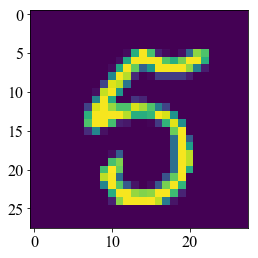

In [58]:
tr_d, va_d, te_d = load_data()
data_no = 31520  #No. of labeled data, should be 0-49999, a total of 50,000 images in this training set
image= np.reshape(tr_d[0][data_no], (28, 28)) 
digit_in_image = tr_d[1][data_no]
print("The hand-written digit in this image is", digit_in_image)
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

### 3.2 Implementation of neuron network

In [59]:
# Import libraries
import random
import numpy as np

class Network(object):
    def __init__(self, sizes):
        '''Initiate the network by number of neurons in each layer, for example sizes = [2,3,1] will 
        create a network with input layer of 2 neurons, one hidden layer of 3 neurons and output layer 
        of 1 neuron '''
        self.num_layers  = len(sizes)
        self.size    = sizes
         #Initiate biases array, random number following Gaussian distributions with mean 0 and 
         # standard deviation 1
        self.biases  = [ np.random.randn(y,1) for y in sizes[1:] ]
         #Initiate weights matrix, pay attention to the matrix dimensions
        self.weights = [ np.random.randn(y,x) for x,y in zip(sizes[:-1],sizes[1:])] 

    def feedforward(self,a):
        '''Return the output of the network with input a'''
        for w,b in zip(self.weights, self.biases):
            a = self.sigmoid(np.dot(w,a) + b)
        return a
    
    def SGD(self , training_data , epochs , mini_batch_size , eta, test_data= None, turnLogON= False):
        """Train the neural network using mini-batch stochastic gradient descent. The ``training_data `` 
        is a list of tuples ``(x, y)`` representing the training inputs and the desired outputs. The 
        other non-optional parameters are self-explanatory. If ``test_data `` is provided then the 
        network will be evaluated against the test data after each epoch, and partial progress printed 
        out. This is useful for tracking progress , but slows things down substantially."""
        if test_data:
            n_test = len(test_data)
            n = len(training_data)
            iter_nums = []
            accuracy  = []
        for j in range(epochs):
            # print("Epoch {0}".format(j))
            random.shuffle(training_data)
            mini_batches = [ training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size) ]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                iter_nums.append(j*n/mini_batch_size)
                accuracy.append(self.evaluate(test_data)/n_test)
            else:
                print("Epoch {0} complete".format(j))
        if turnLogON:
            return iter_nums, accuracy
            
    def update_mini_batch(self , mini_batch , eta):
        """Update the network's weights and biases by applying gradient descent using backpropagation to 
        a single mini batch. The ``mini_batch `` is a list of tuples ``(x, y)``, and ``eta`` is the 
        learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b , delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b , delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w , delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw  for w, nw in zip(self.weights, nabla_w)]
        self.biases =  [b-(eta/len(mini_batch))*nb  for b, nb in zip(self.biases , nabla_b)]
        
    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the gradient for the cost function C_x. 
        ``nabla_b`` and ``nabla_w`` are layer-by-layer lists of numpy arrays, similar to ``self.biases`` 
        and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * self.sigmoid_p(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book. Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_p(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural network outputs the correct result. Note 
        that the neural network's output is assumed to be the index of whichever neuron in the final 
        layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /\partial a for the output activations.
        """
        return (output_activations-y)
    
    # Miscellaneous functions 
    def sigmoid(self, z):
        return 1.0/( 1.0 + np.exp(-z) )
    def sigmoid_p(self, z):
        '''The first derivative of sigmoid function'''
        return 1.0/( 1.0 + np.exp(-z) )/( 1.0 + np.exp(z) )

### 3.3.1 Influence of different learning rate

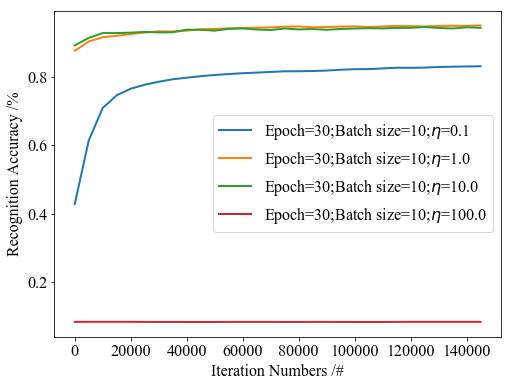

In [50]:
# Loading data from MNIST
training_data, validation_data, test_data = load_data_wrapper()
training_data   = list(training_data)
validation_data = list(validation_data)
test_data       = list(test_data)

#Plot detailed results for analysis
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

value_list = [0.1, 1.0, 10.0, 100.0]
for value in value_list:
    epochs= 30
    mini_batch_size= 10 
    eta = value
    net = Network([784, 30, 10])
    iter_nums, accuracy = net.SGD(training_data, epochs= epochs, mini_batch_size= mini_batch_size, 
                                  eta = eta, test_data=test_data, turnLogON=True)
    line_label = r"Epoch={0};Batch size={1};$\eta$={2}".format(epochs,mini_batch_size,eta)
    plt.plot( iter_nums, accuracy, label=line_label, linewidth=2.0)

ax.set_xlabel("Iteration Numbers /#")
ax.set_ylabel("Recognition Accuracy /%")
plt.legend()
plt.show()

* Learning rate is critical to the learning process. If it is too large, the performance may be similar to simply guessing the result. If it is too small, it may take much longer time to achieve same accuracy comparing with proper learning rate

### 3.3.2 Influence of network depth, the deeper the better?

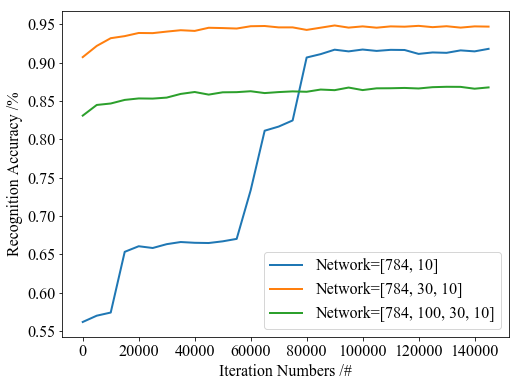

In [56]:
# Loading data from MNIST
training_data, validation_data, test_data = load_data_wrapper()
training_data   = list(training_data)
validation_data = list(validation_data)
test_data       = list(test_data)

#Plot detailed results for analysis
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

value_list = [[784,10],[784,30,10],[784,100,30,10]]
for value in value_list:
    epochs= 30
    mini_batch_size= 10 
    eta = 3.0
    net = Network(value)
    iter_nums, accuracy = net.SGD(training_data, epochs= epochs, mini_batch_size= mini_batch_size, 
                                  eta = eta, test_data=test_data, turnLogON=True)
    line_label = r"Network={0}".format(value)
    plt.plot( iter_nums, accuracy, label=line_label, linewidth=2.0)

ax.set_xlabel("Iteration Numbers /#")
ax.set_ylabel("Recognition Accuracy /%")
plt.legend()
plt.show()

* We can draw one conclusion here: for neuron network design, not always the deeper the better. Deeper network with extra hidden layers sometimes can lead to worse results.

### 3.3.3 Influence of batch sizes

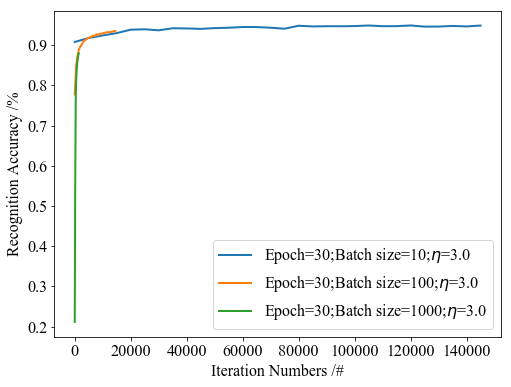

In [62]:
# Loading data from MNIST
training_data, validation_data, test_data = load_data_wrapper()
training_data   = list(training_data)
validation_data = list(validation_data)
test_data       = list(test_data)

#Plot detailed results for analysis
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

value_list = [10,100,1000]
for value in value_list:
    epochs= 30
    mini_batch_size= value 
    eta = 3.0
    net = Network([784,30,10])
    iter_nums, accuracy = net.SGD(training_data, epochs= epochs, mini_batch_size= mini_batch_size, 
                                  eta = eta, test_data=test_data, turnLogON=True)
    line_label = r"Epoch={0};Batch size={1};$\eta$={2}".format(epochs,mini_batch_size,eta)
    plt.plot( iter_nums, accuracy, label=line_label, linewidth=2.0)

ax.set_xlabel("Iteration Numbers /#")
ax.set_ylabel("Recognition Accuracy /%")
plt.legend()
plt.show()


### Exercise
* SVG algorithm
* Guess digit by darkness

In [ ]:
#########################################################################################################